In [1]:
# Additional functions for analysing and manipulating data
from audioop import rms
import io
from msilib.schema import Directory
from re import A
import pandas as pd

# Fundamental package for scientific computing with Python
import numpy as np
from datetime import datetime

# Important package for visualization - we use this to plot the market data
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.dates as mdates
import seaborn as sns
import calplot
import seaborn as sb

# To get the right dates for our prediction of tomorrow's stockdata we need the following package
from datetime import datetime, timedelta

# Spearman correlation package
from scipy.stats import spearmanr

#MinMax scale package
from sklearn import preprocessing

#RNN LSTM package
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#keras tuning packages for RNN LSTM
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

#SES package
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from statsmodels.tsa.api import Holt
import statsmodels.api as sm
from sklearn import metrics

#Kfold Cross Validation
from sklearn.model_selection import cross_val_score

#RFECV 
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from pandas.core.common import random_state

#Keras Tuner for RNN LSTM model configuration
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# importing module for Multi Linear Regression
from sklearn.linear_model import LinearRegression
import pyfinance


# Hiding warnings
import warnings
warnings.filterwarnings('ignore')
#%%

#Import data from csv file
On_Chain_metrics = pd.read_csv(r"D:\Users\samue\Documents\Economics - Data Science Track\Thesis\Code\Full_dataset.csv")

On_Chain_metrics.index

#Date as index in a datetime object format

On_Chain_metrics['Date'] = pd.to_datetime(On_Chain_metrics['Date'])
On_Chain_metrics = On_Chain_metrics.set_index('Date')

d:\Users\samue\Documents\Economics - Data Science Track\Thesis\Code\Github upload\santiment_complete_Finalversion.py:50: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
#Data inspection of 'Bitcoin's On-Chain dataset retrieved via the Santiment's API 
  #We only look at first five here for minimal output

print('We have',On_Chain_metrics.shape[0],'rows and',On_Chain_metrics.shape[1],'columns in this DataFrame')
On_Chain_metrics.head(5)

We have 3305 rows and 36 columns in this DataFrame


,Open,High,Low,Close_Price,Active_Adresses,Age_Destroyed,Network_Profit_Loss,NVT_Ratio,Realized_Value,Token_Age_Consumed,...,HoldersDistr_0.001_0.01,HoldersDistr_0.01_0.1,HoldersDistr_0.1_1,HoldersDistr_1_10,HoldersDistr_10_100,HoldersDistr_100_1K,HoldersDistr_1K_10K,HoldersDistr_10K_100K,HoldersDistr_100K_1M,HoldersDistr_Total
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,135.300,135.980,132.1000,134.21,118017,3088331.326,1578431.768,72.901490,490758736.5,3088331.326,...,189481,186366,103351,100748,82188,10036,1242,99,1,1586121
2013-04-29,134.444,147.488,134.0000,141.96,86925,5548975.889,5448964.002,49.773147,496829280.3,5548975.889,...,189871,186839,104642,101703,82434,10090,1257,97,1,1591308
2013-04-30,134.500,140.609,134.0500,139.00,76871,3708741.742,3281980.015,50.331080,500658674.2,3708741.742,...,190181,185811,104408,101896,82608,10075,1274,95,1,1592744
2013-05-01,139.000,139.890,107.7200,116.99,83565,7794606.754,-2791698.064,28.784587,498349828.3,7794606.754,...,190672,186588,105997,103572,82675,10074,1271,94,1,1598892
2013-05-02,116.380,125.600,92.2819,105.21,81920,5484252.012,-3197558.120,37.071876,495525461.6,5484252.012,...,191342,187163,105942,103389,82731,10078,1267,94,1,1601953


In [3]:
#Checking data types

On_Chain_metrics.dtypes

#Statistical overview of On-Chain metric data
On_Chain_metrics.describe()

correlation_matrix = On_Chain_metrics.drop(['Open ', 'High', 'Low ', 'Dev_Activity', 'Exchange_In_Out_Flow','Age_Destroyed'], axis=1)

#Create new Correlation Matrix: rho
#call the correlation function with method Spearman & round the values to two decimals
rho = correlation_matrix.corr(method="spearman").round(2)

#get the p values
pval = correlation_matrix.corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(*rho.shape)

#set the p values, *** for less than 0.001, ** for less than 0.01, * for less than 0.05
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))

#Corr_Data_Pvalue below gives the dataframe with correlation coefficients and p values
Corr_Data_Pvalue = rho.astype(str) + p

Corr_Data_Pvalue

,Close_Price,Active_Adresses,Network_Profit_Loss,NVT_Ratio,Realized_Value,Token_Age_Consumed,Token_Circulation,Velocity,Whale_Transaction_Count_100K,Exchange_Balance,...,HoldersDistr_0.001_0.01,HoldersDistr_0.01_0.1,HoldersDistr_0.1_1,HoldersDistr_1_10,HoldersDistr_10_100,HoldersDistr_100_1K,HoldersDistr_1K_10K,HoldersDistr_10K_100K,HoldersDistr_100K_1M,HoldersDistr_Total
Close_Price,1.0***,0.89***,0.38***,0.31***,0.95***,0.35***,0.92***,-0.42***,0.92***,0.03,...,0.93***,0.93***,0.93***,0.92***,0.76***,-0.03,0.73***,-0.11***,0.28***,0.94***
Active_Adresses,0.89***,1.0***,0.43***,0.08***,0.89***,0.49***,0.9***,-0.32***,0.91***,0.04*,...,0.91***,0.91***,0.91***,0.91***,0.8***,0.17***,0.79***,0.03,0.2***,0.92***
Network_Profit_Loss,0.38***,0.43***,1.0***,-0.13***,0.25***,0.44***,0.25***,-0.09***,0.43***,0.07***,...,0.26***,0.27***,0.26***,0.28***,0.25***,0.03,0.3***,0.03,-0.25***,0.28***
NVT_Ratio,0.31***,0.08***,-0.13***,1.0***,0.34***,-0.5***,0.31***,-0.2***,0.08***,-0.02,...,0.3***,0.3***,0.31***,0.31***,0.24***,-0.38***,0.21***,-0.32***,0.28***,0.29***
Realized_Value,0.95***,0.89***,0.25***,0.34***,1.0***,0.3***,0.98***,-0.42***,0.87***,0.01,...,0.98***,0.98***,0.98***,0.97***,0.8***,0.01,0.82***,-0.1***,0.35***,0.98***
Token_Age_Consumed,0.35***,0.49***,0.44***,-0.5***,0.3***,1.0***,0.31***,-0.18***,0.49***,0.11***,...,0.32***,0.32***,0.32***,0.33***,0.33***,0.23***,0.29***,0.17***,-0.04*,0.33***
Token_Circulation,0.92***,0.9***,0.25***,0.31***,0.98***,0.31***,1.0***,-0.39***,0.87***,0.01,...,1.0***,1.0***,1.0***,0.99***,0.82***,0.04*,0.88***,-0.11***,0.37***,0.99***
Velocity,-0.42***,-0.32***,-0.09***,-0.2***,-0.42***,-0.18***,-0.39***,1.0***,-0.27***,0.01,...,-0.38***,-0.38***,-0.38***,-0.4***,-0.4***,0.3***,-0.25***,0.15***,-0.08***,-0.38***
Whale_Transaction_Count_100K,0.92***,0.91***,0.43***,0.08***,0.87***,0.49***,0.87***,-0.27***,1.0***,0.06***,...,0.88***,0.88***,0.88***,0.87***,0.76***,0.13***,0.72***,0.01,0.24***,0.89***
Exchange_Balance,0.03,0.04*,0.07***,-0.02,0.01,0.11***,0.01,0.01,0.06***,1.0***,...,0.02,0.02,0.01,0.02,0.06**,0.06***,0.01,0.06**,0.03,0.02


<AxesSubplot:>

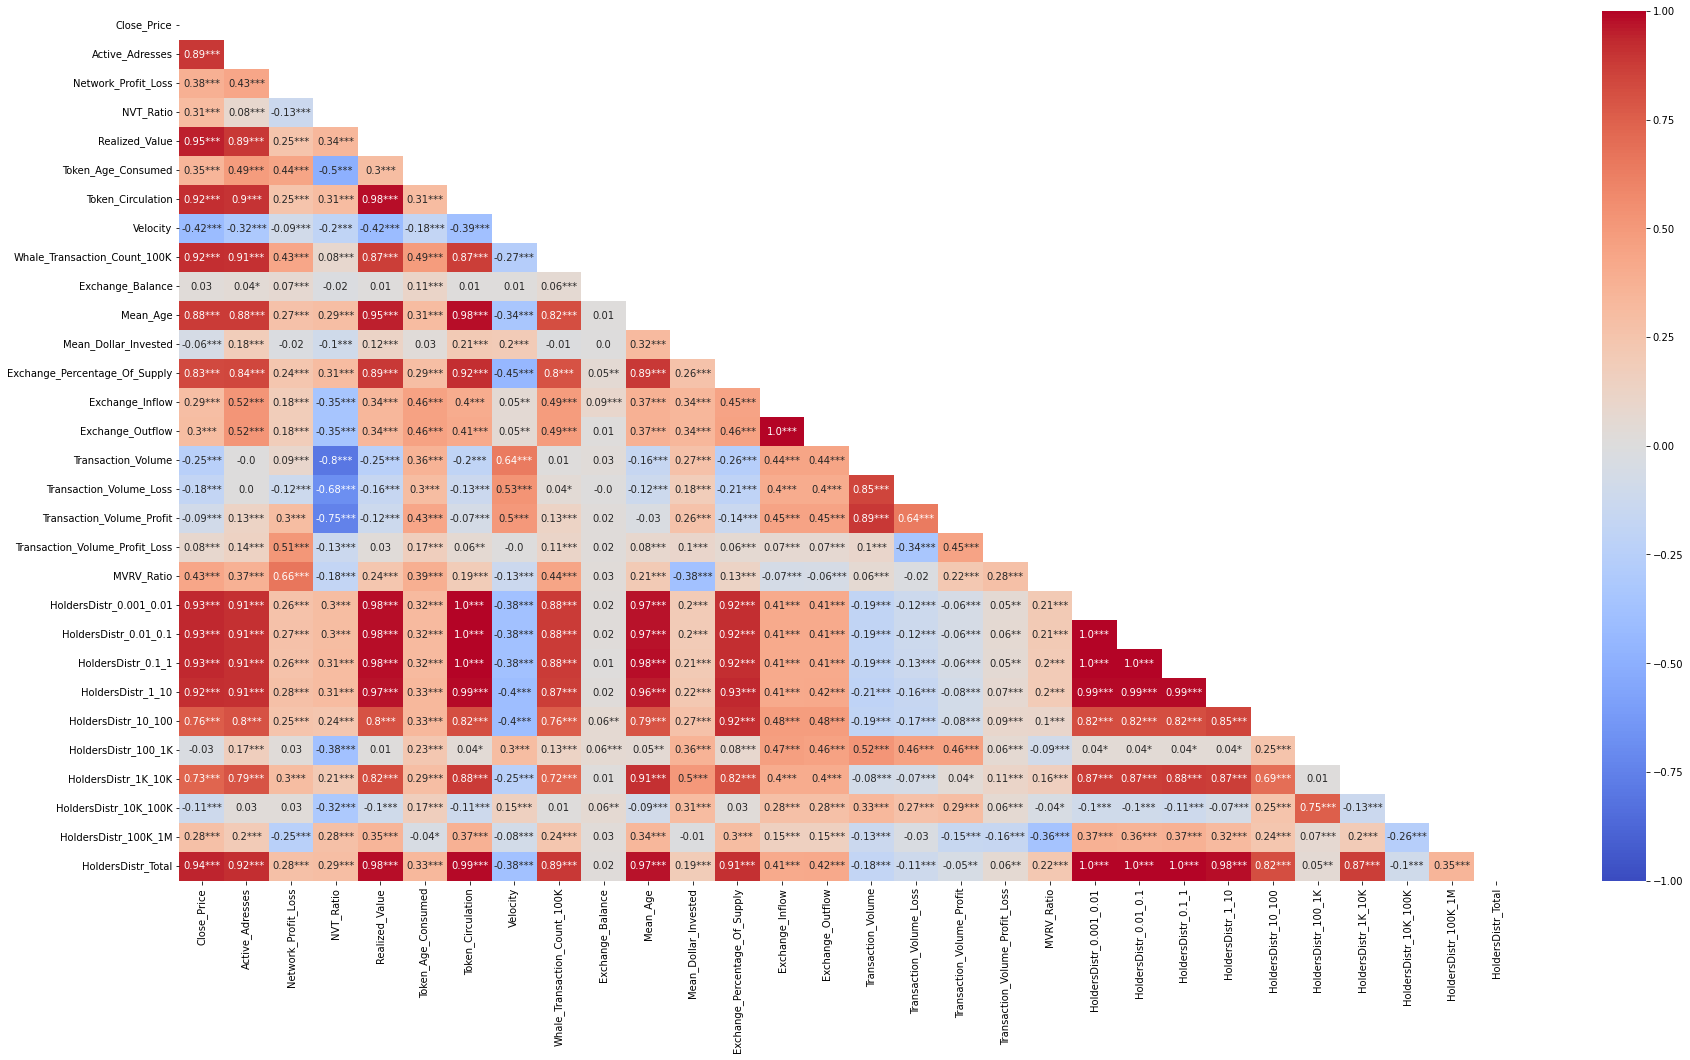

In [4]:
#Creating a correlation matrix between all the features in the dataset for a heatmap

#Create the matrix based on the spearman correlation method
matrix = np.triu(correlation_matrix.corr(method="spearman"))

#convert to array for the heatmap
Heatmap_Dataset = Corr_Data_Pvalue.to_numpy()

#plot the heatmap
plt.figure(figsize=(30,16))
sns.heatmap(rho, annot = Heatmap_Dataset, fmt='', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

In [5]:
#Correlation dataframe previously derived from Spearman method duplicated
#because the loop function doesn't work with the Close_Price with Pvalues (asterix) in thesame column in dataframe: Corr_Data_Pvalue,
#rho will be used to create Spearman's correlation table Appended as a column in the dataframe as "Spearman_Verdict"
#https://www.statstutor.ac.uk/resources/uploaded/spearmans.pdf

Spearman_Verdict = []

for value in rho["Close_Price"]:

    if value > 0:
      if value < .20:
        Spearman_Verdict.append("Very Weak") 
      elif value < .40:
        Spearman_Verdict.append("Weak")
      elif value < .60: 
        Spearman_Verdict.append("moderate")
      elif value < .80:
        Spearman_Verdict.append("strong")
      else:
        Spearman_Verdict.append("Very Strong")
    else:
      if value > -.20:
        Spearman_Verdict.append("Very Weak") 
      elif value > -.40:
        Spearman_Verdict.append("Weak")
      elif value > -.60: 
        Spearman_Verdict.append("moderate")
      elif value > -.80:
        Spearman_Verdict.append("strong")
      else:
        Spearman_Verdict.append("Very Strong")

rho["Spearman_Verdict"] = Spearman_Verdict

#Select Columns: Close_Price & Spearman_Verdict
rho =rho[["Close_Price","Spearman_Verdict"]]

#Drop the first 4 rows of the dataframe: Open, High, Low & Close_Price, 
rho = rho.drop(rho.iloc[[0]].index)

#Name index: 'Metrics'
rho.index.name = 'Metrics'

print('We have',rho.shape[0],'rows and',rho.shape[1],'columns in this DataFrame')
rho

We have 29 rows and 2 columns in this DataFrame


,Close_Price,Spearman_Verdict
Metrics,,
Active_Adresses,0.89,Very Strong
Network_Profit_Loss,0.38,Weak
NVT_Ratio,0.31,Weak
Realized_Value,0.95,Very Strong
Token_Age_Consumed,0.35,Weak
Token_Circulation,0.92,Very Strong
Velocity,-0.42,moderate
Whale_Transaction_Count_100K,0.92,Very Strong
Exchange_Balance,0.03,Very Weak


In [6]:
# Add the Close Price to the "rho" selection of indicators to make an array to use in subselecting 
# the correct metrics (indicators) to use for the RNN LSTM

#First use the index: 'Metrics' to make a new column in the dataframe
rho.reset_index('Metrics', inplace=True)

#Now convert the new column into an array 
Metrics = rho['Metrics'].to_numpy()

#Add Close_Price
Metrics = np.append(Metrics, "Close_Price")

# Set as new dataframe
BTC_dataset = On_Chain_metrics[Metrics]
BTC_dataset

,Active_Adresses,Network_Profit_Loss,NVT_Ratio,Realized_Value,Token_Age_Consumed,Token_Circulation,Velocity,Whale_Transaction_Count_100K,Exchange_Balance,Mean_Age,...,HoldersDistr_0.01_0.1,HoldersDistr_0.1_1,HoldersDistr_1_10,HoldersDistr_10_100,HoldersDistr_100_1K,HoldersDistr_1K_10K,HoldersDistr_10K_100K,HoldersDistr_100K_1M,HoldersDistr_Total,Close_Price
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,118017,1.578432e+06,72.901490,4.907587e+08,3.088331e+06,11091241.56,3.385165,168,-6779.833453,433.700318,...,186366,103351,100748,82188,10036,1242,99,1,1586121,134.21000
2013-04-29,86925,5.448964e+06,49.773147,4.968293e+08,5.548976e+06,11095591.56,3.818162,257,-16831.283010,434.029987,...,186839,104642,101703,82434,10090,1257,97,1,1591308,141.96000
2013-04-30,76871,3.281980e+06,50.331080,5.006587e+08,3.708742e+06,11099316.56,2.671813,150,-14322.599390,434.550016,...,185811,104408,101896,82608,10075,1274,95,1,1592744,139.00000
2013-05-01,83565,-2.791698e+06,28.784587,4.983498e+08,7.794607e+06,11103091.56,2.263695,161,22299.434520,434.700079,...,186588,105997,103572,82675,10074,1271,94,1,1598892,116.99000
2013-05-02,81920,-3.197558e+06,37.071876,4.955255e+08,5.484252e+06,11106441.56,2.694628,91,5511.002188,435.075016,...,187163,105942,103389,82731,10078,1267,94,1,1601953,105.21000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-11,1001181,-1.832637e+09,47.614994,4.392820e+11,2.355069e+07,19159276.30,8.038394,17885,-22467.776040,1303.264975,...,6550340,2645900,691078,131396,13765,2151,89,4,42250517,28936.35503
2022-05-12,1041518,-1.379093e+09,49.150598,4.379270e+11,2.190925e+07,19160130.09,15.156163,19941,-5064.547641,1303.063398,...,6569578,2651292,691945,131019,13776,2142,87,4,42347643,29047.75100
2022-05-13,1034813,-2.084038e+08,66.691680,4.377700e+11,3.026656e+07,19161833.45,15.107831,16691,5236.174755,1302.367979,...,6577516,2651660,692757,131473,13754,2127,88,4,42412358,29283.10381


In [7]:
#Creating a dataframe with the Close Price as the target variable for Double Exponential Smoothing

On_Chain_DES = BTC_dataset['Close_Price']
df_train = pd.DataFrame(On_Chain_DES.iloc[:2000], columns=['Close_Price'])
df_test = pd.DataFrame(On_Chain_DES.iloc[2000:], columns=['Close_Price'])

In [8]:
#Scaling the test and train dataset between 0 and 1 seperately
sct = MinMaxScaler(feature_range= (0, 1))

df_train_sc = sct.fit_transform(df_train)
df_test_sc = sct.transform(df_test)

In [9]:
#Evaluation metrics

def mean_absolute_percentage_error(y_true, y_pred):
    '''
    Calculate the mean absolute percentage error as a metric for evaluation
    
    Args:
        y_true (float64): Y values for the dependent variable (test part), numpy array of floats 
        y_pred (float64): Predicted values for the dependen variable (test parrt), numpy array of floats
    
    Returns:
        Mean absolute percentage error 
    '''    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def timeseries_evaluation_metrics_func(y_true, y_pred):
    '''
    Calculate the following evaluation metrics:
        - MSE
        - MAE
        - RMSE
        - MAPE
        - R²
    
    Args:
        y_true (float64): Y values for the dependent variable (test part), numpy array of floats 
        y_pred (float64): Predicted values for the dependen variable (test parrt), numpy array of floats
    
    Returns:
        MSE, MAE, RMSE, MAPE and R² 
    '''    
    print('Evaluation metric results: ')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [10]:
#Double Exponential Smoothing with the optimized version of the algorithm
#Where data is scaled between 0 and 1 for comparison with the RNN LSTM and Rolling Linear Regression

DES = Holt(df_train_sc)
fit_Holt_auto = DES.fit(optimized= True, use_brute = True)

fcst_auto_pred_Holt = fit_Holt_auto.forecast(len(df_test_sc))
timeseries_evaluation_metrics_func(df_test_sc, fcst_auto_pred_Holt)

#Double Exponential Smoothing with the optimized version of the algorithm
#Where data is not scaled, but will be used for plotting the result in the code below
DES = Holt(df_train)
fit_Holt_auto2 = DES.fit(optimized= True, use_brute = True)

fcst_auto_pred_Holt2 = fit_Holt_auto2.forecast(len(df_test))
timeseries_evaluation_metrics_func(df_test, fcst_auto_pred_Holt2)

Evaluation metric results: 
MSE is : 1.4035134125040594
MAE is : 0.7841875331811562
RMSE is : 1.1846997140643107
MAPE is : 56.938344002173544
R2 is : -0.468909538010025

Evaluation metric results: 
MSE is : 487523519.8002911
MAE is : 14465.703855420601
RMSE is : 22079.934777989973
MAPE is : 60.37049008156007
R2 is : -0.35168204614992526



In [11]:
#Scaled data result summary of the Double Exponential Smoothing
fit_Holt_auto.summary()

Dep. Variable:,endog,No. Observations:,2000
Model:,Holt,SSE,0.295
Optimized:,True,AIC,-17635.434
Trend:,Additive,BIC,-17613.031
Seasonal:,None,AICC,-17635.392
Seasonal Periods:,None,Date:,"Mon, 22 Aug 2022"
Box-Cox:,False,Time:,00:35:55
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,1.0636e-18,beta,True


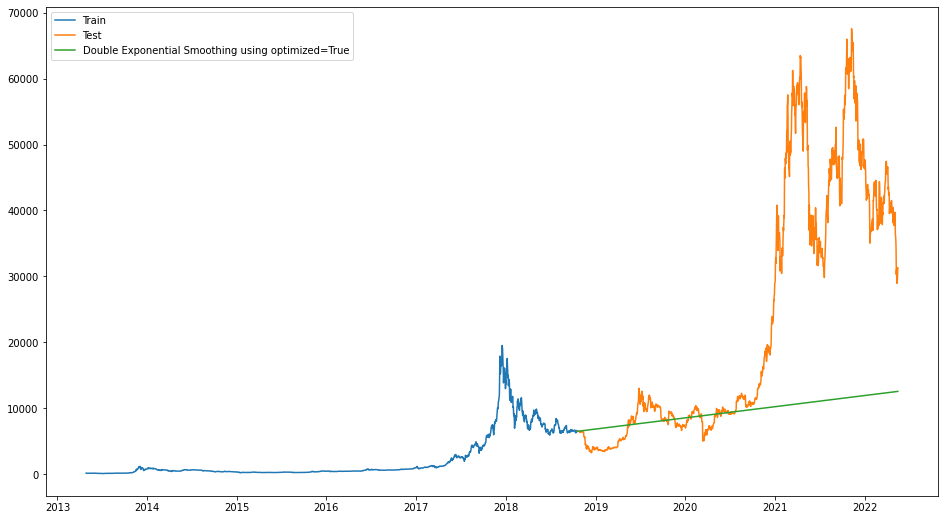

In [12]:
#plotting the results for DES with the unscaled dataset

plt.rcParams["figure.figsize"] = [16,9]
plt.plot(df_train, label='Train')
plt.plot(df_test, label='Test')
plt.plot(fcst_auto_pred_Holt2, label='Double Exponential Smoothing using optimized=True')
plt.legend(loc='best')
plt.show()

Optimal number of features: 5


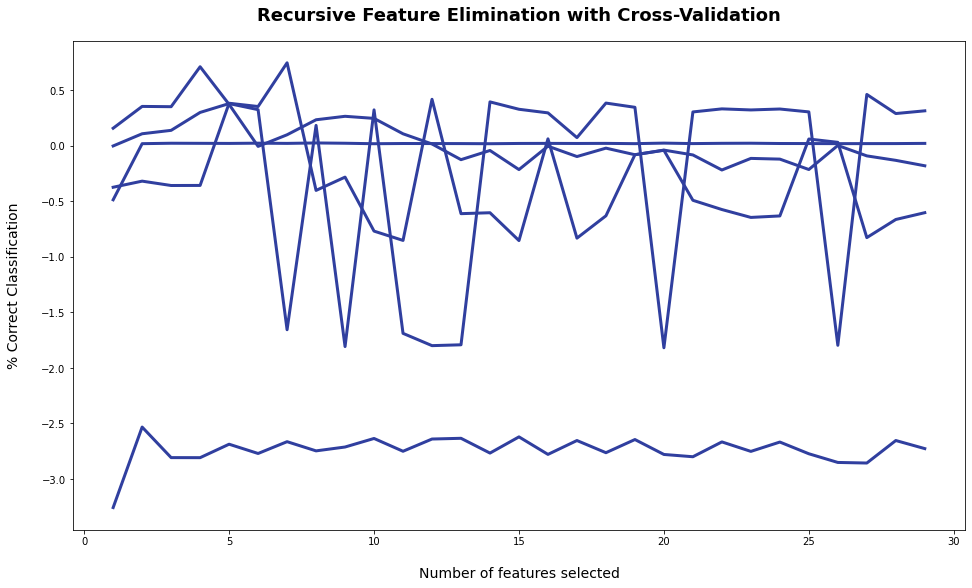

In [13]:
# Moving on to Recursive Feature Selection
# Define X as all dependent variables(features) to be selected from & target as the independent variable
X_input = BTC_dataset.drop('Close_Price', axis=1)
target = BTC_dataset['Close_Price']

#Chose  a random state seed for reproducibility
rfc = DecisionTreeRegressor(random_state=45)
rfecv = RFECV(estimator=rfc, step=1, cv=5, scoring='r2')

#redifine X as a 
rfecv.fit(X_input, target)

# to see how many features are optimal to produce the best accuracy
print('Optimal number of features: {}'.format(rfecv.n_features_))

#plot the accuracy obtained with every number of features used:

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

[ 0  1  2  4  6  7  8  9 11 12 13 14 15 16 17 19 20 21 22 23 25 26 27 28]
[0.00971045 0.94890963 0.00301358 0.03314793 0.0052184 ]


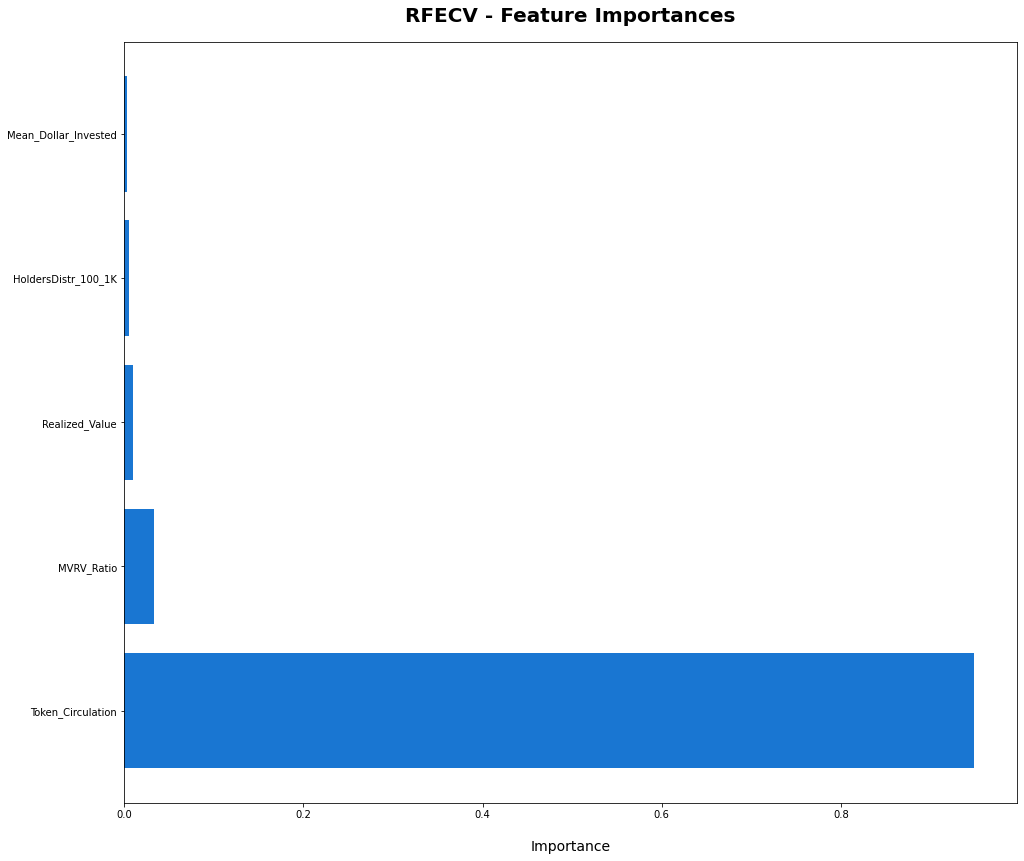

,attr,importance
1,Token_Circulation,0.948910
3,MVRV_Ratio,0.033148
0,Realized_Value,0.009710
4,HoldersDistr_100_1K,0.005218
2,Mean_Dollar_Invested,0.003014


In [14]:
#which features are considered to be least important and drop them with this snippet:
print(np.where(rfecv.support_ == False)[0])

X_input.drop(X_input.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

#feature_importance
print(rfecv.estimator_.feature_importances_)

dset = pd.DataFrame()
dset['attr'] = X_input.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

dset  

In [15]:
# Create a an input variable of previous days closing price
Input_Price = BTC_dataset['Close_Price'].shift(1)


Input_Price = pd.DataFrame(Input_Price)

Input_Price.columns = ['Input_Price']

#Adding Input_Price column to On_Chain_Metrics
BTC_dataset["Input_Price"] = Input_Price

BTC_dataset

,Active_Adresses,Network_Profit_Loss,NVT_Ratio,Realized_Value,Token_Age_Consumed,Token_Circulation,Velocity,Whale_Transaction_Count_100K,Exchange_Balance,Mean_Age,...,HoldersDistr_0.1_1,HoldersDistr_1_10,HoldersDistr_10_100,HoldersDistr_100_1K,HoldersDistr_1K_10K,HoldersDistr_10K_100K,HoldersDistr_100K_1M,HoldersDistr_Total,Close_Price,Input_Price
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,118017,1.578432e+06,72.901490,4.907587e+08,3.088331e+06,11091241.56,3.385165,168,-6779.833453,433.700318,...,103351,100748,82188,10036,1242,99,1,1586121,134.21000,NaN
2013-04-29,86925,5.448964e+06,49.773147,4.968293e+08,5.548976e+06,11095591.56,3.818162,257,-16831.283010,434.029987,...,104642,101703,82434,10090,1257,97,1,1591308,141.96000,134.21000
2013-04-30,76871,3.281980e+06,50.331080,5.006587e+08,3.708742e+06,11099316.56,2.671813,150,-14322.599390,434.550016,...,104408,101896,82608,10075,1274,95,1,1592744,139.00000,141.96000
2013-05-01,83565,-2.791698e+06,28.784587,4.983498e+08,7.794607e+06,11103091.56,2.263695,161,22299.434520,434.700079,...,105997,103572,82675,10074,1271,94,1,1598892,116.99000,139.00000
2013-05-02,81920,-3.197558e+06,37.071876,4.955255e+08,5.484252e+06,11106441.56,2.694628,91,5511.002188,435.075016,...,105942,103389,82731,10078,1267,94,1,1601953,105.21000,116.99000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-11,1001181,-1.832637e+09,47.614994,4.392820e+11,2.355069e+07,19159276.30,8.038394,17885,-22467.776040,1303.264975,...,2645900,691078,131396,13765,2151,89,4,42250517,28936.35503,31022.90541
2022-05-12,1041518,-1.379093e+09,49.150598,4.379270e+11,2.190925e+07,19160130.09,15.156163,19941,-5064.547641,1303.063398,...,2651292,691945,131019,13776,2142,87,4,42347643,29047.75100,28936.35503
2022-05-13,1034813,-2.084038e+08,66.691680,4.377700e+11,3.026656e+07,19161833.45,15.107831,16691,5236.174755,1302.367979,...,2651660,692757,131473,13754,2127,88,4,42412358,29283.10381,29047.75100


In [16]:
'''select those attributes deemed relevant by the RFECV model in the previous code'''

#select those attributes deemed relevant by the RFECV model in the previous code # 'Input_Price',

to_keep = X_input.columns.tolist()
to_keep.append('Input_Price')
to_keep.append('Close_Price')
BTC_dataset2 = BTC_dataset[to_keep]

# Drop NaN values in BTC_dataset
BTC_dataset2 = BTC_dataset2.dropna()

print(BTC_dataset2.head)

<bound method NDFrame.head of             Realized_Value  Token_Circulation  Mean_Dollar_Invested  \
Date                                                                  
2013-04-29    4.968293e+08        11095591.56             46.360141   
2013-04-30    5.006587e+08        11099316.56             46.612618   
2013-05-01    4.983498e+08        11103091.56             47.169633   
2013-05-02    4.955255e+08        11106441.56             47.892928   
2013-05-03    4.929310e+08        11109841.56             48.542271   
...                    ...                ...                   ...   
2022-05-11    4.392820e+11        19159276.30            332.274727   
2022-05-12    4.379270e+11        19160130.09            333.293425   
2022-05-13    4.377700e+11        19161833.45            333.473255   
2022-05-14    4.384560e+11        19162839.93            333.000937   
2022-05-15    4.383980e+11        19163602.63            333.834586   

            MVRV_Ratio  HoldersDistr_100_1K  I

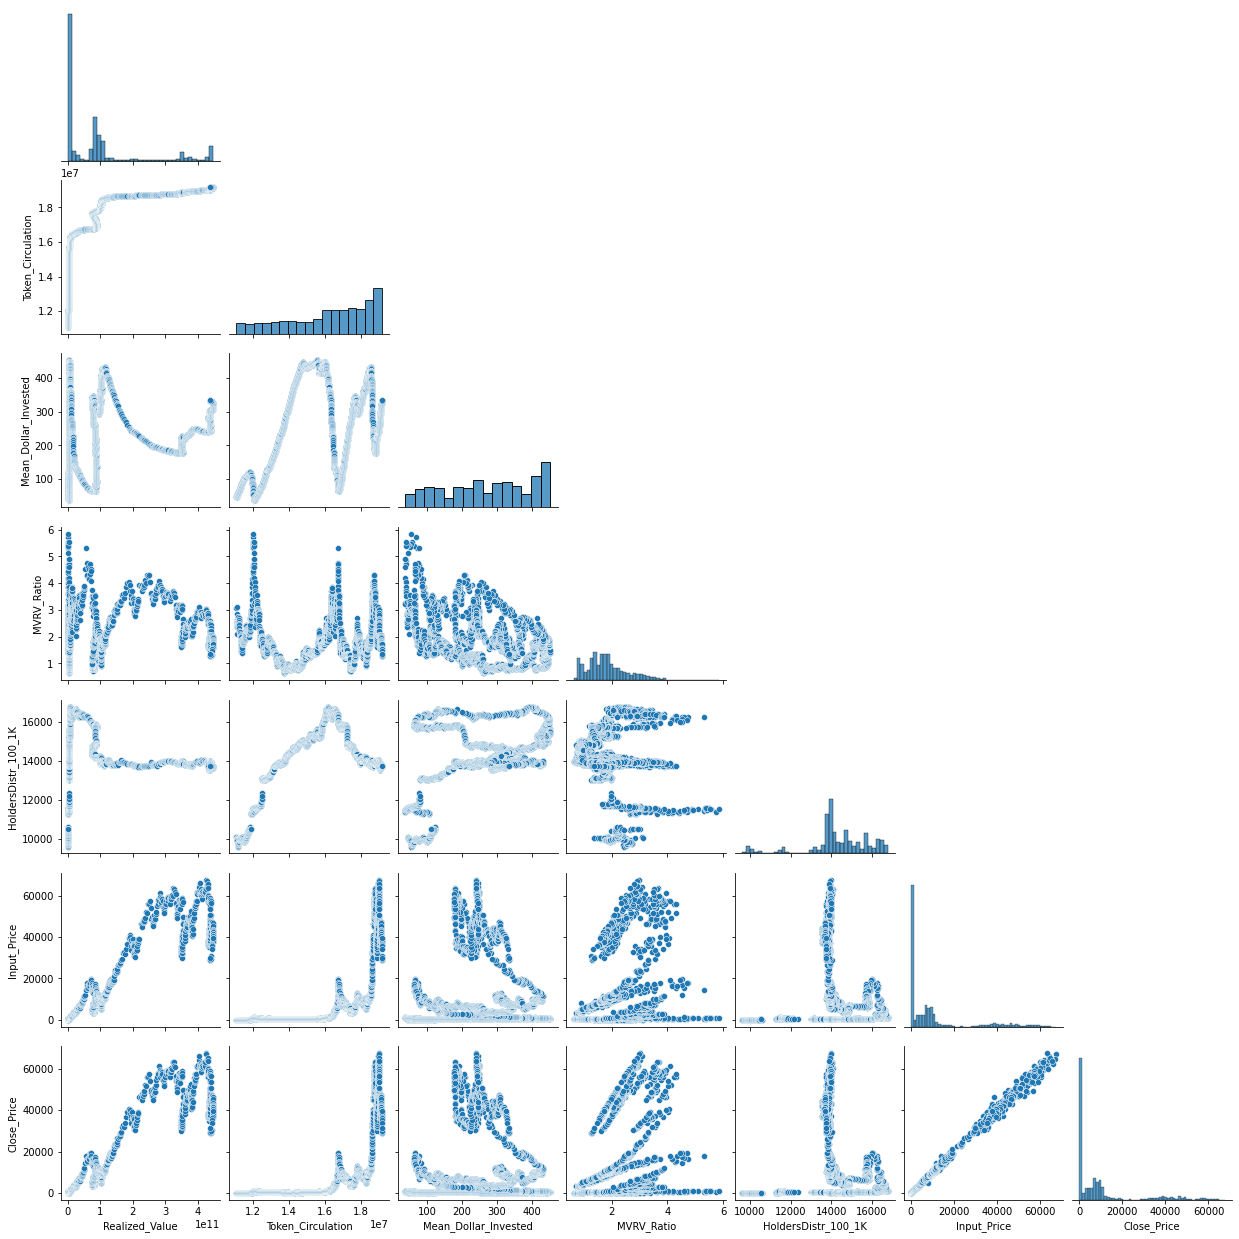

In [17]:
#Performance analytics core chart


sb.pairplot(BTC_dataset2, corner=True)

In [18]:
correlation_matrix = BTC_dataset2

#Create new Correlation Matrix: rho
#call the correlation function with method Spearman & round the values to two decimals
rho = correlation_matrix.corr(method="spearman").round(2)

#get the p values
pval = correlation_matrix.corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(*rho.shape)

#set the p values, *** for less than 0.001, ** for less than 0.01, * for less than 0.05
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))

#Corr_Data_Pvalue below gives the dataframe with correlation coefficients and p values
Corr_Data_Pvalue = rho.astype(str) + p

print(Corr_Data_Pvalue)

                     Realized_Value Token_Circulation Mean_Dollar_Invested  \
Realized_Value               1.0***           0.98***              0.12***   
Token_Circulation           0.98***            1.0***              0.21***   
Mean_Dollar_Invested        0.12***           0.21***               1.0***   
MVRV_Ratio                  0.24***           0.19***             -0.37***   
HoldersDistr_100_1K            0.01             0.04*              0.36***   
Input_Price                 0.95***           0.92***             -0.06***   
Close_Price                 0.95***           0.92***             -0.06***   

                     MVRV_Ratio HoldersDistr_100_1K Input_Price Close_Price  
Realized_Value          0.24***                0.01     0.95***     0.95***  
Token_Circulation       0.19***               0.04*     0.92***     0.92***  
Mean_Dollar_Invested   -0.37***             0.36***    -0.06***    -0.06***  
MVRV_Ratio               1.0***            -0.09***     0.43***

<AxesSubplot:>

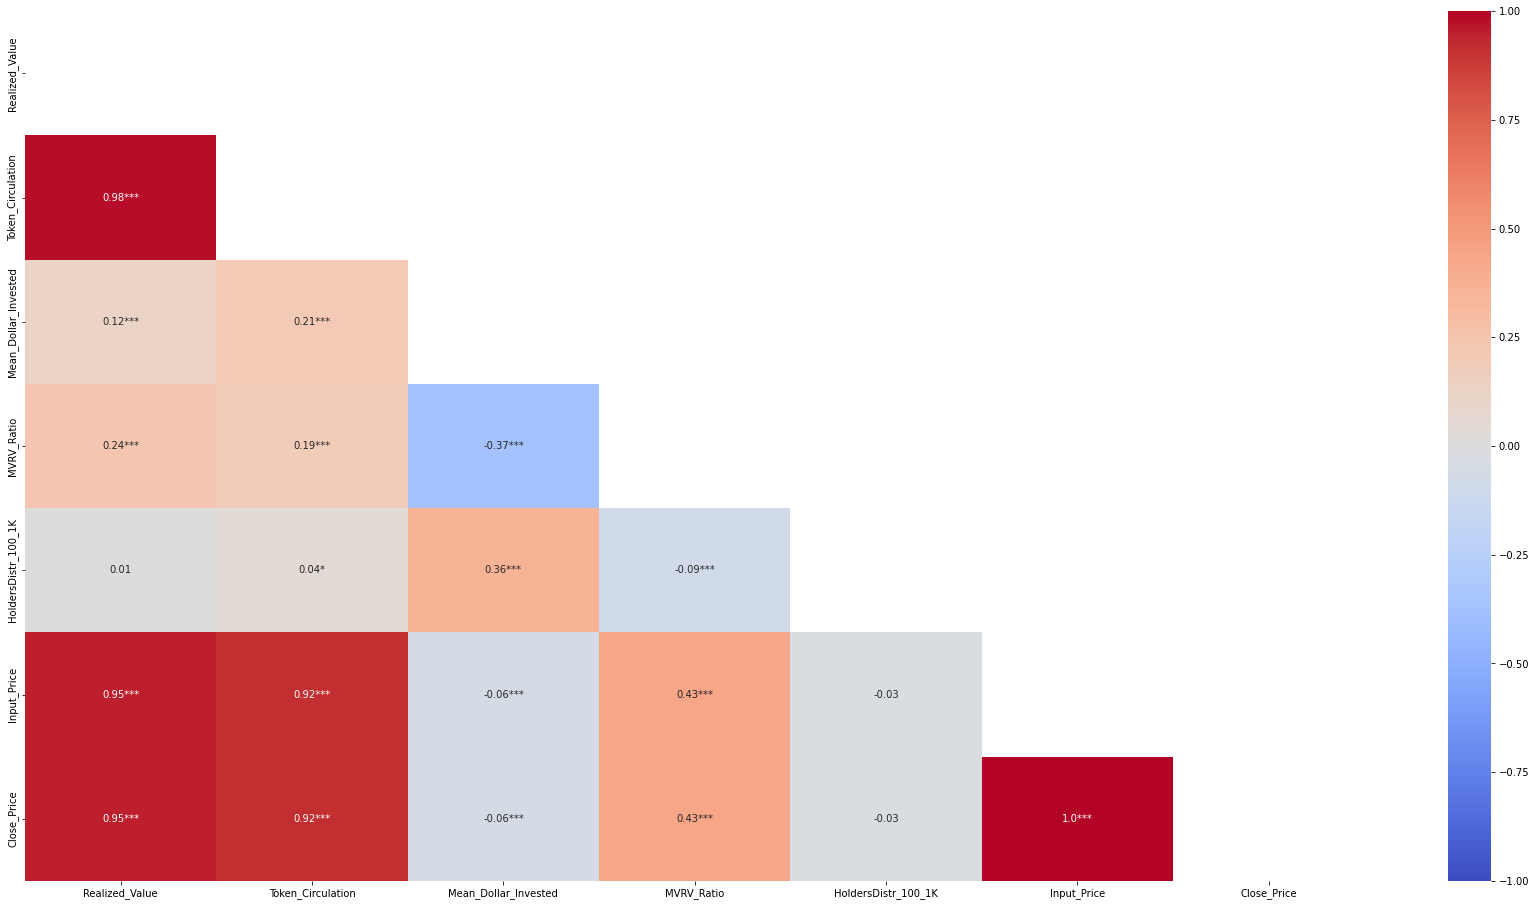

In [19]:
#Creating a correlation matrix between all the features in the dataset for a heatmap

#Create the matrix based on the spearman correlation method
matrix = np.triu(correlation_matrix.corr(method="spearman"))

#convert to array for the heatmap
Heatmap_Dataset = Corr_Data_Pvalue.to_numpy()

#plot the heatmap
plt.figure(figsize=(30,16))
sns.heatmap(rho, annot = Heatmap_Dataset, fmt='', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

In [20]:
#Correlation dataframe previously derived from Spearman method duplicated
#because the loop function doesn't work with the Close_Price with Pvalues (asterix) in thesame column in dataframe: Corr_Data_Pvalue,
#rho will be used to create Spearman's correlation table Appended as a column in the dataframe as "Spearman_Verdict"
#https://www.statstutor.ac.uk/resources/uploaded/spearmans.pdf

Spearman_Verdict = []

for value in rho["Close_Price"]:

    if value > 0:
      if value < .20:
        Spearman_Verdict.append("Very Weak") 
      elif value < .40:
        Spearman_Verdict.append("Weak")
      elif value < .60: 
        Spearman_Verdict.append("moderate")
      elif value < .80:
        Spearman_Verdict.append("strong")
      else:
        Spearman_Verdict.append("Very Strong")
    else:
      if value > -.20:
        Spearman_Verdict.append("Very Weak") 
      elif value > -.40:
        Spearman_Verdict.append("Weak")
      elif value > -.60: 
        Spearman_Verdict.append("moderate")
      elif value > -.80:
        Spearman_Verdict.append("strong")
      else:
        Spearman_Verdict.append("Very Strong")

rho["Spearman_Verdict"] = Spearman_Verdict

#Select Columns: Close_Price & Spearman_Verdict
rho =rho[["Close_Price","Spearman_Verdict"]]

#Drop the first 4 rows of the dataframe: Open, High, Low & Close_Price, 
#rho = rho.drop(rho.iloc[[0]].index)

#Name index: 'Metrics'
rho.index.name = 'Metrics'

print('We have',rho.shape[0],'rows and',rho.shape[1],'columns in this DataFrame')
rho

We have 7 rows and 2 columns in this DataFrame


,Close_Price,Spearman_Verdict
Metrics,,
Realized_Value,0.95,Very Strong
Token_Circulation,0.92,Very Strong
Mean_Dollar_Invested,-0.06,Very Weak
MVRV_Ratio,0.43,moderate
HoldersDistr_100_1K,-0.03,Very Weak
Input_Price,1.00,Very Strong
Close_Price,1.00,Very Strong


[[4.96829280e+08 1.10955916e+07 4.63601406e+01 ... 1.00900000e+04
  1.34210000e+02 1.41960000e+02]
 [5.00658674e+08 1.10993166e+07 4.66126185e+01 ... 1.00750000e+04
  1.41960000e+02 1.39000000e+02]
 [4.98349828e+08 1.11030916e+07 4.71696329e+01 ... 1.00740000e+04
  1.39000000e+02 1.16990000e+02]
 ...
 [4.37770000e+11 1.91618334e+07 3.33473255e+02 ... 1.37540000e+04
  2.90477510e+04 2.92831038e+04]
 [4.38456000e+11 1.91628399e+07 3.33000937e+02 ... 1.37400000e+04
  2.92831038e+04 3.01012664e+04]
 [4.38398000e+11 1.91636026e+07 3.33834586e+02 ... 1.37490000e+04
  3.01012664e+04 3.13051126e+04]]


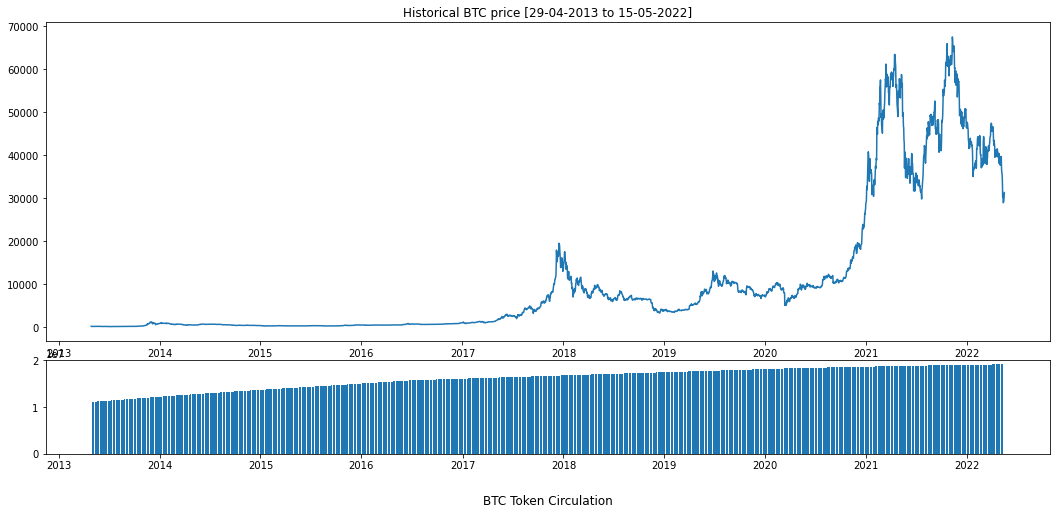

In [21]:
# Plot historic graph

# frist turn dataset into array
BTC_dataset2_np = BTC_dataset2.to_numpy()
print(BTC_dataset2_np)
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(BTC_dataset2.index, BTC_dataset2["Close_Price"])
plt.title('Historical BTC price [29-04-2013 to 15-05-2022]')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(BTC_dataset2.index, BTC_dataset2['Token_Circulation'])
plt.title('BTC Token Circulation', y=-0.60)
plt.gcf().set_size_inches(18,10)

In [22]:
#Data split into X and Y in preperation for RNN LSTM

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
  X, y = list(), list()
  for i in range(len(sequences)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the dataset
    if end_ix > len(sequences):
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)
  # choose 14 days time steps to look back 
n_steps = 7

# convert into input/output
X, y = split_sequences(BTC_dataset2_np, n_steps)

print(X.shape, y.shape)

n_features = X.shape[2]

for i in range(len(X[:1])):
  print(X[i],'y:',y[i])

#Splitting dataset into training, testing and validation to be used for multi linear regression model
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y, test_size=0.20, random_state=42) #0.16 & #0.20

#Minmax scaling -> train dataset
sc_LR = MinMaxScaler(feature_range= (0, 1))
sc1_LR = MinMaxScaler(feature_range= (0, 1))

X_train_scaled_LR = sc_LR.fit_transform(X_train_LR.reshape(-1,1)).reshape(X_train_LR.shape)
y_train_scaled_LR = sc1_LR.fit_transform(y_train_LR.reshape(-1,1)).reshape(y_train_LR.shape)

#Minmax scaling -> test dataset
X_test_scaled_LR = sc_LR.transform(X_test_LR.reshape(-1,1)).reshape(X_test_LR.shape)
y_test_scaled_LR = sc1_LR.transform(y_test_LR.reshape(-1,1)).reshape(y_test_LR.shape)

print(("length of training dataset:"), len(X_train_scaled_LR), (" & "), ("length of testing dataset:"), len(X_test_scaled_LR))
print(X_train_scaled_LR.shape)

print(y_train_scaled_LR.shape)

(3298, 7, 6) (3298,)
[[4.96829280e+08 1.10955916e+07 4.63601406e+01 3.07691841e+00
  1.00900000e+04 1.34210000e+02]
 [5.00658674e+08 1.10993166e+07 4.66126185e+01 3.10766129e+00
  1.00750000e+04 1.41960000e+02]
 [4.98349828e+08 1.11030916e+07 4.71696329e+01 2.84478649e+00
  1.00740000e+04 1.39000000e+02]
 [4.95525462e+08 1.11064416e+07 4.78929284e+01 2.49648575e+00
  1.00780000e+04 1.16990000e+02]
 [4.92931009e+08 1.11098416e+07 4.85422709e+01 2.10779154e+00
  1.00260000e+04 1.05210000e+02]
 [4.93695868e+08 1.11138416e+07 4.92746616e+01 2.35562407e+00
  1.00290000e+04 9.77500000e+01]
 [4.96000178e+08 1.11179666e+07 4.98183528e+01 2.55236758e+00
  9.98200000e+03 1.12500000e+02]] y: 115.91
length of training dataset: 2638  &  length of testing dataset: 660
(2638, 7, 6)
(2638,)


In [23]:
#Reshaping train data from 3d to 2d

nsamples, nx, ny = X_train_scaled_LR.shape
d2_train_scaled = X_train_scaled_LR.reshape((nsamples,nx*ny))

#Reshaping test data from 3d to 2d

nsamples, nx, ny = X_test_scaled_LR.shape
d2_test_scaled = X_test_scaled_LR.reshape((nsamples,nx*ny))

In [24]:
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(d2_train_scaled,y_train_scaled_LR)

LinearRegression()

In [25]:
y_prediction =  LR.predict(d2_test_scaled)
y_prediction

print("mean_squared_error is==",mean_squared_error(y_test_scaled_LR,y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test_scaled_LR,y_prediction)))

mean_squared_error is== 6.54031847110112e-05
root_mean_squared error of is== 0.008087223547733252


In [26]:
pred_df=pd.DataFrame({'Actual Value':y_test_scaled_LR,'Predicted Value':y_prediction,'Difference':y_test_scaled_LR-y_prediction})
pred_df['sq_er'] = pred_df['Difference']*pred_df['Difference']
pred_df['BTC_RMSE_LIN'] = np.sqrt(pred_df['sq_er'])
pred_df 

,Actual Value,Predicted Value,Difference,sq_er,BTC_RMSE_LIN
0,0.054645,0.053537,0.001108,1.226821e-06,0.001108
1,0.009189,0.000604,0.008585,7.370995e-05,0.008585
2,0.582712,0.586556,-0.003844,1.477365e-05,0.003844
3,0.101678,0.102384,-0.000706,4.984198e-07,0.000706
4,0.081529,0.082109,-0.000580,3.364684e-07,0.000580
...,...,...,...,...,...
655,0.734281,0.687501,0.046780,2.188371e-03,0.046780
656,0.002367,0.002303,0.000064,4.068149e-09,0.000064
657,0.003158,0.002469,0.000689,4.742842e-07,0.000689
658,0.000440,-0.004066,0.004506,2.030724e-05,0.004506


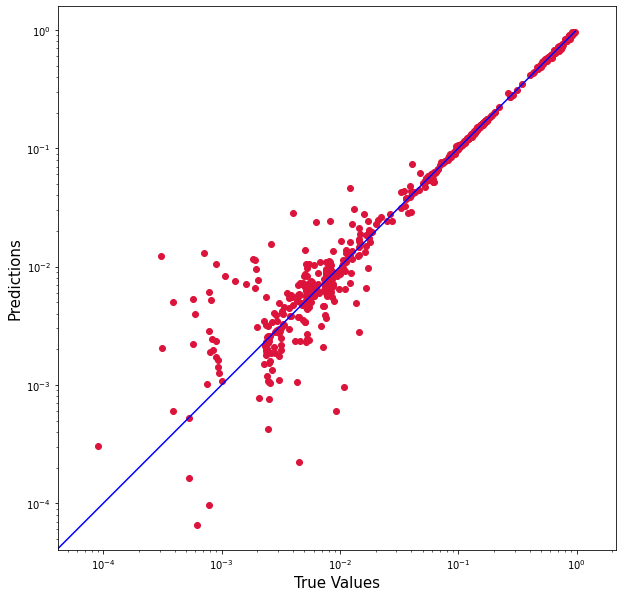

In [27]:
# Plotting the graph with scatter plot multi linear regression
plt.figure(figsize=(10,10))
plt.scatter(y_test_scaled_LR, y_prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_prediction), max(y_test_scaled_LR))
p2 = min(min(y_prediction), min(y_test_scaled_LR))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

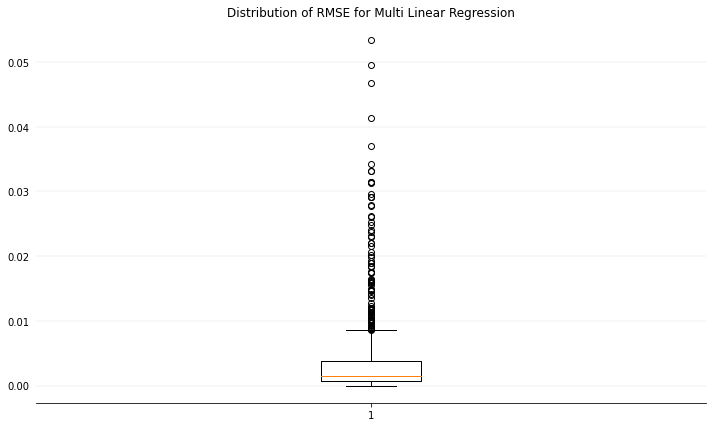

In [28]:
# Plotting the graph with boxplot

fig, ax = plt.subplots(figsize=(12, 7))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Distribution of RMSE for Multi Linear Regression')
# Set labels for the boxplot
dataset = pred_df['BTC_RMSE_LIN']
labels = pred_df['BTC_RMSE_LIN']
ax.boxplot(dataset)
plt.show()

In [29]:
#Splitting dataset into training, testing and validation to be used for RNN LSTM model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.16, random_state=42) #0.16 & #0.20

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1) # 0.25 x 0.8 = 0.2


"""The reason for using fit and then transform with train data is a) Fit would calculate mean,var etc of train set and
 then try to fit the model to data b) post which transform is going to convert data as per the fitted model.
If you use fit again with test set this is going to add bias to your model.
"""

#Minmax scaling -> train dataset
sc = MinMaxScaler(feature_range= (0, 1))
sc1 = MinMaxScaler(feature_range= (0, 1))

X_train_scaled = sc.fit_transform(X_train.reshape(-1,1)).reshape(X_train.shape)
y_train_scaled = sc1.fit_transform(y_train.reshape(-1,1)).reshape(y_train.shape)

#Minmax scaling 3.0 -> val dataset
X_val_scaled = sc.transform(X_val.reshape(-1,1)).reshape(X_val.shape)
y_val_scaled = sc1.transform(y_val.reshape(-1,1)).reshape(y_val.shape)

#Minmax scaling 3.0 -> test dataset
X_test_scaled = sc.transform(X_test.reshape(-1,1)).reshape(X_test.shape)
y_test_scaled = sc1.transform(y_test.reshape(-1,1)).reshape(y_test.shape)

print(("length of training dataset:"), len(X_train_scaled), (" & "), ("length of testing dataset:"), len(X_test_scaled), ("length of validation dataset:"), len(X_val_scaled))

print(X_train_scaled.shape)

print(y_test_scaled.shape)

length of training dataset: 2216  &  length of testing dataset: 528 length of validation dataset: 554
(2216, 7, 6)
(528,)


In [32]:
model = Sequential()

model.add(keras.Input(shape=(X_train.shape[-2:])))
model.add(LSTM(18, activation = 'tanh', return_sequences = False))
model.add(Dropout(0.1))
model.add(Dense(46))
model.add(Dense(4))
model.add(Dense(1, activation = 'tanh'))


#Compile the Model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0001), loss = tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

#Fit data to model
es = EarlyStopping(monitor='val_loss', patience=11, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train_scaled, epochs=25, batch_size=1, validation_data=(X_val_scaled, y_val_scaled), callbacks=[es])

Epoch 1/25
2216/2216 [==============================] - 7s 3ms/step - loss: 0.0556 - rmse: 0.2359 - val_loss: 0.0469 - val_rmse: 0.2165
Epoch 2/25
2216/2216 [==============================] - 6s 2ms/step - loss: 0.0395 - rmse: 0.1987 - val_loss: 0.0358 - val_rmse: 0.1891
Epoch 3/25
2216/2216 [==============================] - 6s 3ms/step - loss: 0.0305 - rmse: 0.1746 - val_loss: 0.0280 - val_rmse: 0.1673
Epoch 4/25
2216/2216 [==============================] - 6s 3ms/step - loss: 0.0237 - rmse: 0.1541 - val_loss: 0.0225 - val_rmse: 0.1498
Epoch 5/25
2216/2216 [==============================] - 7s 3ms/step - loss: 0.0190 - rmse: 0.1378 - val_loss: 0.0184 - val_rmse: 0.1357
Epoch 6/25
2216/2216 [==============================] - 7s 3ms/step - loss: 0.0168 - rmse: 0.1296 - val_loss: 0.0154 - val_rmse: 0.1242
Epoch 7/25
2216/2216 [==============================] - 7s 3ms/step - loss: 0.0140 - rmse: 0.1183 - val_loss: 0.0131 - val_rmse: 0.1146
Epoch 8/25
2216/2216 [==========================

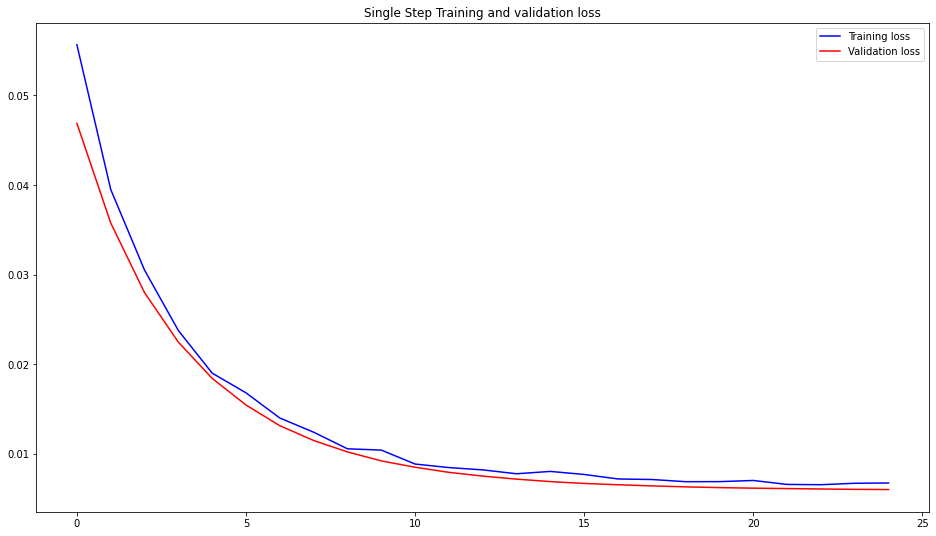

In [35]:
# Plot training
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()
    
plot_train_history(history,
'Single Step Training and validation loss')

In [36]:
#Prediction values from model
prediction = model.predict(X_test_scaled)

17/17 [==============================] - 0s 2ms/step


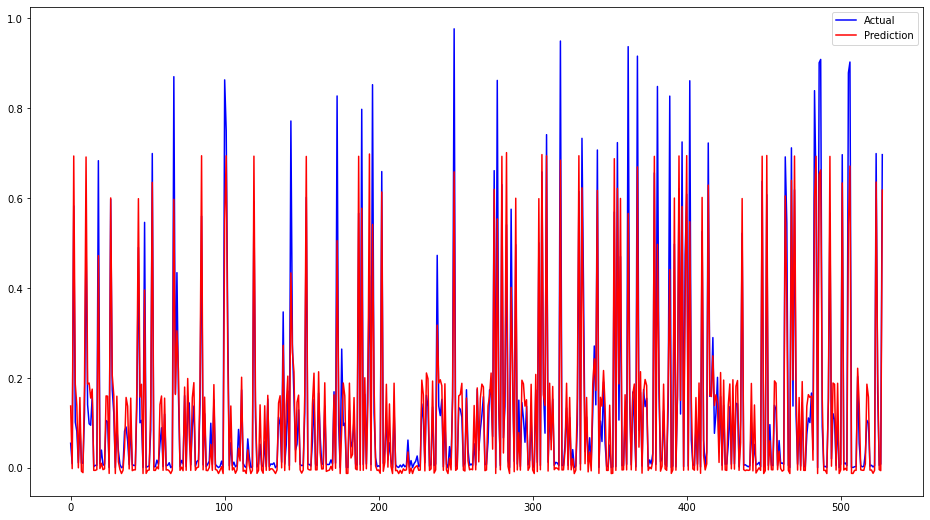

In [37]:
#Plotting the actual and prediction value
plt.plot(y_test_scaled, color='blue', label='Actual')
plt.plot(prediction, color='red', label='Prediction')
plt.legend()
plt.show()

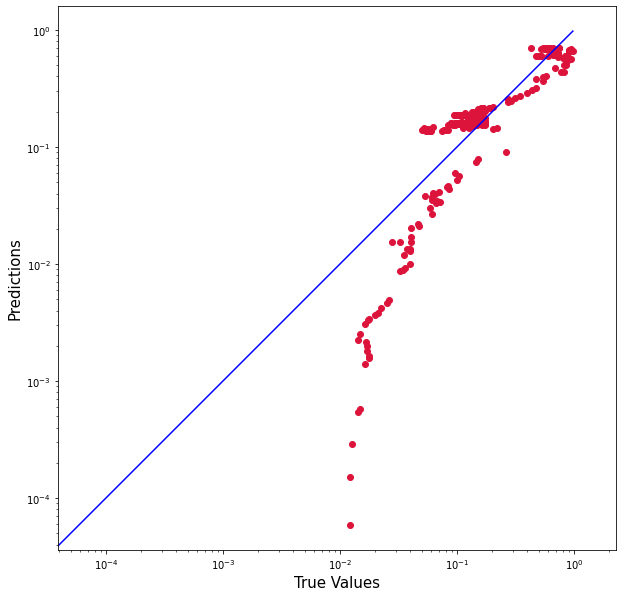

In [38]:
#Plotting the actual and prediction value
plt.figure(figsize=(10,10))
plt.scatter(y_test_scaled, prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction), max(y_test_scaled))
p2 = min(min(prediction), min(y_test_scaled))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [40]:
Predicted_values = pd.DataFrame(prediction[:528])
Predicted_values.rename(columns={0: 'predicted'}, inplace=True)
Actual_values = pd.DataFrame(y_test_scaled[:])
Actual_values.rename(columns={0: 'Actual'}, inplace=True)

All_values = pd.concat([Actual_values, Predicted_values], axis=1)
All_values ["RMSE"] = All_values.apply(lambda x: mean_squared_error(All_values.loc[:x.name, 'Actual'].tolist(), All_values.loc[:x.name, 'predicted'].tolist(), squared=False), axis = 1)
All_values 

,Actual,predicted,RMSE
0,0.054645,0.137515,0.082871
1,0.009189,-0.001825,0.059114
2,0.582712,0.693705,0.080225
3,0.101678,0.186498,0.081398
4,0.081529,0.138437,0.077125
...,...,...,...
523,0.699154,0.635759,0.075693
524,0.168087,0.210243,0.075644
525,0.005693,-0.004077,0.075573
526,0.008264,-0.006261,0.075504


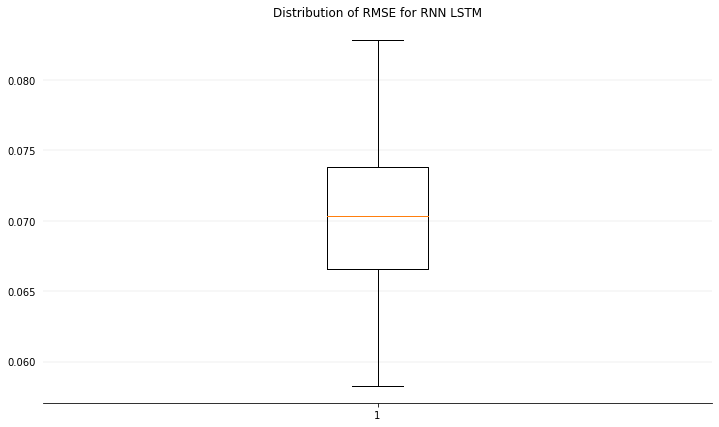

In [41]:
#Boxplot of RMSE for RNN LSTM

fig, ax = plt.subplots(figsize=(12, 7))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Distribution of RMSE for RNN LSTM')
# Set names as labels for the boxplot
dataset = All_values["RMSE"]
labels = All_values
ax.boxplot(dataset)
plt.show()

In [44]:
def createLSTMModel():
                 
  #Initialising the RNN
  model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
  model.add(keras.Input(shape=(X_train.shape[-2:])))
  
  model.add(LSTM(18, activation = 'tanh', return_sequences = False))
  model.add(Dropout(0.1))
  model.add(Dense(46))
  model.add(Dense(4))
  model.add(Dense(1, activation = 'tanh'))
  
  #Compile the Model
  model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0007), loss = tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

  return model

model_LSTM = KerasRegressor(build_fn=createLSTMModel)
BTSCV = BlockingTimeSeriesSplit(n_splits) 

rmse_block = np.sqrt(-cross_val_score(model_LSTM, X_train_scaled, y_train_scaled, cv=BTSCV, scoring='neg_mean_squared_error'))

print('The root mean squared errors for each of the 10 splits are:', rmse_block)
print('The mean RMSE for the folds is: ', (sum(rmse_block)/10))

4/4 [==============================] - 0s 3ms/step
The root mean squared errors for each of the 10 splits are: [0.19669726 0.23920603 0.31501338 0.24728531 0.21588463 0.27542726
 0.31776606 0.31998495 0.25897194 0.21893393]
The mean RMSE for the folds is:  0.2605170762285497


In [45]:
df_results = pd.DataFrame(rmse_block)
df_results = df_results.rename(columns={0:'BTC_RMSE_RNN'})
df_results.to_csv('BITCOIN_ON_CHAIN_LSTM.csv')